# Produce Fig. 5 of Donada et al. 2023
### Example CMD of a GOG-simulated OC (NGC 6494)

In [1]:
import numpy as np, math
from sklearn.mixture import GaussianMixture
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy.stats import norm
from astropy.table import Table

import random

from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from scipy import interpolate

import os.path

font = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 14}

In [14]:
# Read GOG-simulated members of NGC 6494:
t = Table.read("data/NGC_6494_sel_MS_members_sim_9.txt", format="ascii")
# Add some useful columns
t["BP-RP"]      = t["Bp"] - t["Rp"]
t["MG"]         = t["G"] - t["DistMod"] - 0.89*t["Av"]
t["BP-RP_0"]    = t["BP-RP"] - (0.89/1.85)*t["Av"]
t["mass_ratio"] = np.zeros(len(t))  # Placeholder, to be filled later

# Read Gaia Universe Model file containing the simulated OC with a total mass of 10^4 M_Sun, 
# with the generated systems and their characteristics
t_Universe_model = Table.read("data/NGC_6494_all_mem_UniverseModel_sim_9.txt", format="csv")

Number of systems in the simulated CMD: 682
Number of unresolved systems in the simulated CMD: 270
Number of resolved systems in the simulated CMD: 94
Number of single systems in the simulated CMD: 318


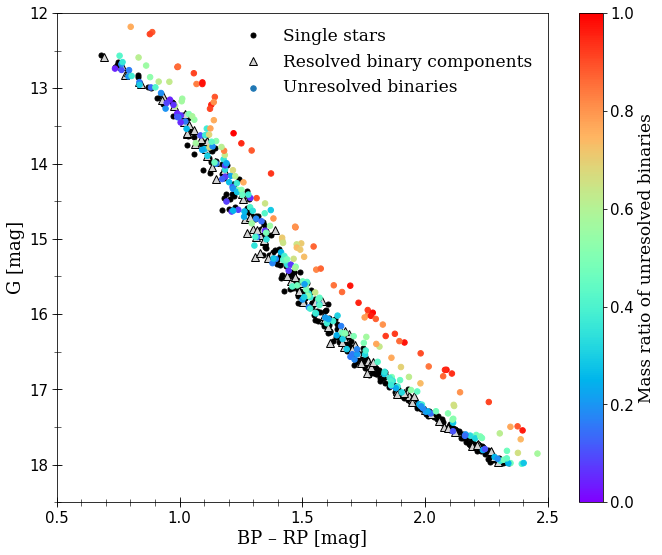

In [16]:
unresolved_list_indices = []
resolved_list_indices = []
simple_list_indices = []

for jj in np.arange(len(t)):
    # What happens to unresolved systems:
    if "*" in t["#ID"][jj]:
        more_massive_star = str((t["#ID"][jj])[:-1])+str("A")
        t_more_massive    = t_Universe_model[ (t_Universe_model["#ID"] == more_massive_star) ]
        less_massive_star = str((t["#ID"][jj])[:-1])+str("B")
        t_less_massive    = t_Universe_model[ (t_Universe_model["#ID"] == less_massive_star) ]
        mass_ratio        = (t_less_massive["Mass"][0]) / (t_more_massive["Mass"][0])
        t["mass_ratio"][jj] = mass_ratio
        unresolved_list_indices.append(jj)

    elif ("A" in t["#ID"][jj]) or ("B" in t["#ID"][jj]):
        # These are resolved binary systems
        (t["mass_ratio"][jj]) = -1.0   
        resolved_list_indices.append(jj)
    else:
        # These are single stars
        (t["mass_ratio"][jj]) = 0.0
        simple_list_indices.append(jj)
print("Number of systems in the simulated CMD:", len(rowset))

rowset_unresolved = t[unresolved_list_indices]
print("Number of unresolved systems in the simulated CMD:", len(rowset_unresolved))
rowset_resolved   = t[resolved_list_indices]
print("Number of resolved systems in the simulated CMD:", len(rowset_resolved))
rowset_simple     = t[simple_list_indices]
print("Number of single systems in the simulated CMD:", len(rowset_simple))

xpts = t["BP-RP"]
ypts = t["G"]

xpts_simples = rowset_simple["BP-RP"]
ypts_simples = rowset_simple["G"]

xpts_resolved = rowset_resolved["BP-RP"]
ypts_resolved = rowset_resolved["G"]

xpts_unresolved = rowset_unresolved["BP-RP"]
ypts_unresolved = rowset_unresolved["G"]

savename=cluslist[ii].strip()


# Plot colour-magnitude diagram with its fitted polynomial
plt.figure(figsize=(11,9))
ax = plt.subplot(111)
plt.xticks(np.arange(0.5, 3., step=0.5), fontsize=15)
plt.yticks(np.arange(12, 19, step=1), fontsize=15)
ax.tick_params(which="major", direction='inout', length=10.)
ax.tick_params(which="minor", direction='inout', length=7.)
plt.xlim(0.5, 2.5)
plt.ylim(18.5, 12.0)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

# x range in which the fitted polynomial is represented:
x = np.linspace(np.min(xpts), np.max(xpts), 100)
plt.plot(xpts_simples, ypts_simples, 'o', color = 'black', markersize=5, label="Single stars", zorder=0)
plt.plot(xpts_resolved, ypts_resolved, '^', color = 'lightgrey', markeredgecolor="k",
         markersize=8, label="Resolved binary components", zorder=0)
sc = ax.scatter(xpts_unresolved, ypts_unresolved, s=30, c=rowset_unresolved["mass_ratio"] , 
                cmap="rainbow", label="Unresolved binaries", vmin=0, vmax=1.0)
cb = plt.colorbar(sc)
cb.set_label('Mass ratio of unresolved binaries', fontsize=17, fontdict=font)
cb.ax.tick_params(labelsize=15) 

plt.ylabel(r'G [mag]', fontsize = 18, fontdict=font)
plt.xlabel(r'BP – RP [mag]', fontsize = 18, fontdict=font)
plt.legend(prop={"family":"serif", 'size': 17}, edgecolor="white")
plt.savefig("im/"+savename+"_sim_CMD_MS_sel_mem_colorbar"+"_sim9_obsCMD.png", dpi=300)
plt.show()
plt.close()